# StackOverflow Popular Language Identification based on Tags Count

# What's this? 

In this project, We will find out the most popular programming languages on **StackOverflow** based on the Tags count.


In [ ]:
#!!pip3 install beautifulsoup4

### Display Matplotlib Plots inline

In [35]:
%matplotlib inline

## Packages used

In [23]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
#import matplotlib.pyplot as plt
#import matplotlib.style as style
import seaborn as sns

### Creating an empty Dictonary to fill in with extracted information

In [12]:
df = {'Language':[],'Tag_Count':[]}

In [18]:
#url = "https://stackoverflow.com/questions/13769514/requests-with-python-3-3"
#content = requests.get(url)
#content.content

b'<!DOCTYPE html>\r\n\r\n\r\n    <html itemscope itemtype="http://schema.org/QAPage" class="html__responsive">\r\n\r\n    <head>\r\n\r\n        <title>pip - Requests with python 3.3 - Stack Overflow</title>\r\n        <link rel="shortcut icon" href="https://cdn.sstatic.net/Sites/stackoverflow/img/favicon.ico?v=4f32ecc8f43d">\r\n        <link rel="apple-touch-icon image_src" href="https://cdn.sstatic.net/Sites/stackoverflow/img/apple-touch-icon.png?v=c78bd457575a">\r\n        <link rel="search" type="application/opensearchdescription+xml" title="Stack Overflow" href="/opensearch.xml">\r\n        <meta name="viewport" content="width=device-width, height=device-height, initial-scale=1.0, minimum-scale=1.0">\r\n\r\n\r\n        <meta property="og:type" content= "website" />\r\n        <meta property="og:url" content="https://stackoverflow.com/questions/13769514/requests-with-python-3-3"/>\r\n        <meta property="og:site_name" content="Stack Overflow" />\r\n        <meta property="og:imag

### Creating a new function to scrape Tag counts

In [19]:
def extract_tagged(url):
    #print('Extracting Content')
    content = requests.get(url).content
    soup = bs(content,'html.parser')
     
    for tag in soup.find_all('a',attrs={'class':'post-tag'}):
        df['Language'].append(tag.text)
    for count in soup.find_all('span',attrs={'class':'item-multiplier-count'}):
        df['Tag_Count'].append(count.text)
    

### Iterating the extraction through different Languages

In [20]:
for i in range(1,3):
    extract_tagged('http://stackoverflow.com/tags?page='+str(i)+'&tab=popular')    
df['Tag_Count']=[int(i) for i in df['Tag_Count']]

df2= pd.DataFrame(df)
df2

,Language,Tag_Count
0,javascript,1735551
1,java,1495695
2,c#,1271075
3,php,1250717
4,android,1160773
5,python,1082124
6,jquery,938693
7,html,794081
8,c++,598697
9,ios,586311


### Sorting 

In [34]:
sorted_short_df = df2.sort_values(by='Tag_Count',ascending=False).head(20)#.set_index('Language')
#sorted_short_df.plot(kind='bar')

sorted_short_df

,Language,Tag_Count
0,javascript,1735551
1,java,1495695
2,c#,1271075
3,php,1250717
4,android,1160773
5,python,1082124
6,jquery,938693
7,html,794081
8,c++,598697
9,ios,586311


## A Normal Plot to tell the Story

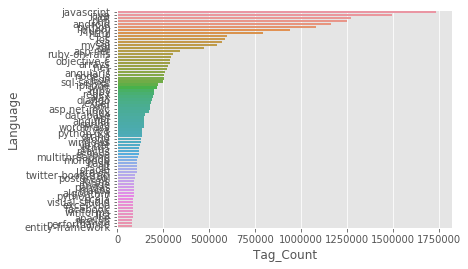

In [25]:
sns.barplot(y = "Language", x = "Tag_Count", data = df2)

## Increase the figure size

In [38]:
sns.set(rc={'figure.figsize':(12,20)})

## Set a new Theme

In [39]:
sns.set(style="whitegrid")

## Slightly nice Plot

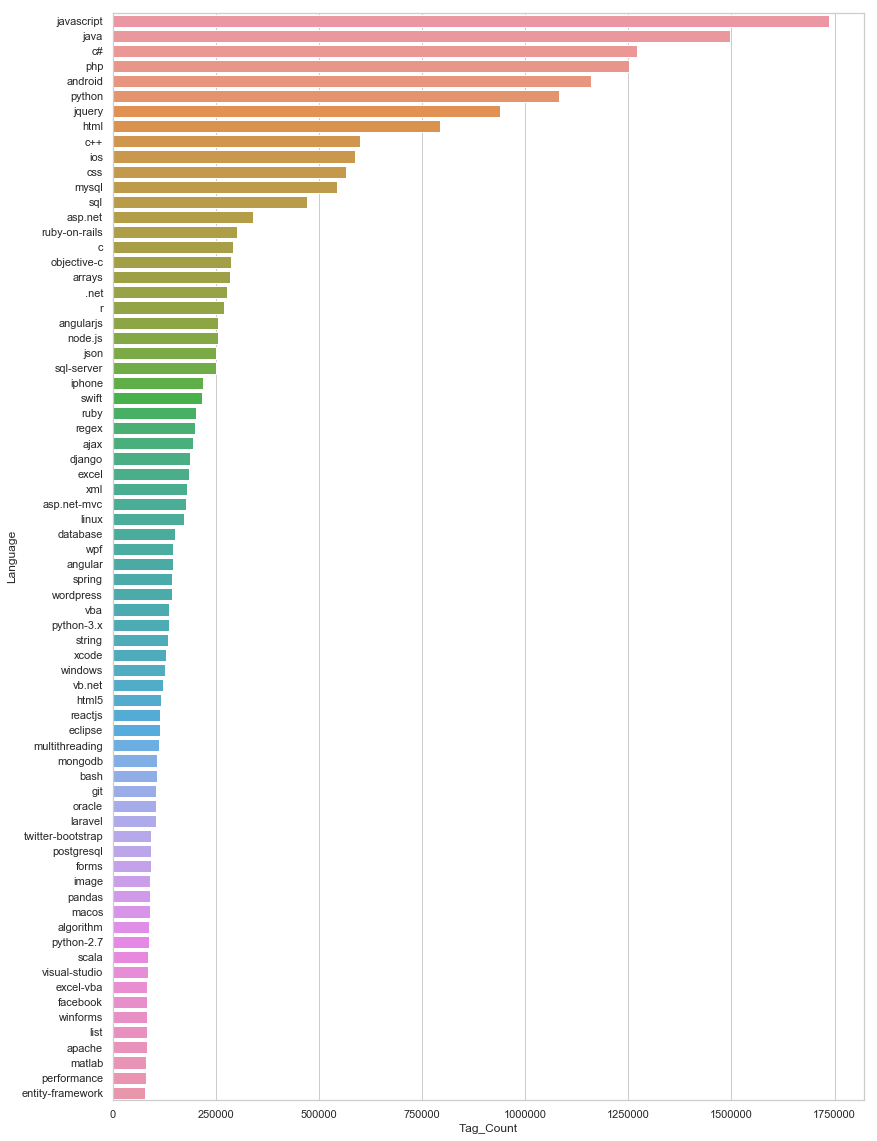

In [40]:
sns.barplot(y = "Language", x = "Tag_Count", data = df2)